In [144]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def run_analysis(filename):
    contents = None
    with open(filename, "r") as f:
        contents = [ i for i in f.readlines() if i.startswith("FOUND") ]

    bugs_simreq = []
    bugs_dse = []
    difference = []
    for line in contents:
        dse, simreq = float(line[6:11]), float(line[12:17])
        bugs_dse.append(dse)
        bugs_simreq.append(simreq)
        difference.append(simreq - dse)

    bugsupper = int(max(max(bugs_simreq), max(bugs_dse))) + 1
    occurences_map = {
        (i, j, len([
            None for index in range(len(difference))
            if (bugs_simreq[index] == i) and (bugs_dse[index] == j)
        ]))
        for i in range(0, bugsupper)
        for j in range(0, bugsupper)
    }
    occurences = np.zeros(shape=(bugsupper, bugsupper))
    for i, j, v in occurences_map:
        occurences[i][j] = np.log2(v + 1)
    
    ttest_result = stats.ttest_1samp(difference, 0., alternative="greater")
    print(ttest_result)
    
    return bugsupper, difference, occurences

In [165]:
logfname = "log_2"
simreq_type = "Standard"
bugsupper, difference, occurences = run_analysis(logfname + ".txt")
figdpi = 600

TtestResult(statistic=10.35310264399531, pvalue=7.231411168680877e-24, df=748)


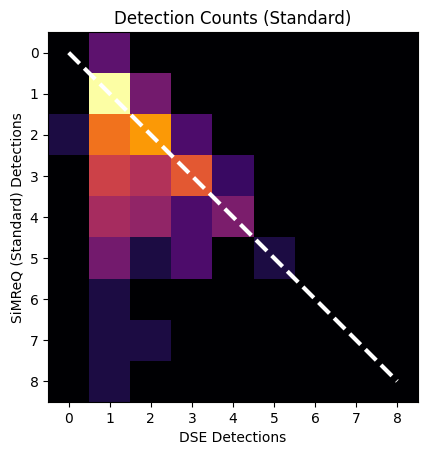

In [166]:
plt.imshow(occurences, cmap="inferno", aspect="equal")
plt.xticks(np.arange(0, bugsupper))
plt.yticks(np.arange(0, bugsupper))
plt.plot([0, bugsupper-1], [0, bugsupper-1], color="white", linewidth=3, linestyle="dashed")
plt.xlabel("DSE Detections")
plt.ylabel(f"SiMReQ ({simreq_type}) Detections")
plt.title(f"Detection Counts ({simreq_type})")
plt.savefig(f"fig_heatmap-{logfname}.png", dpi=figdpi)
None

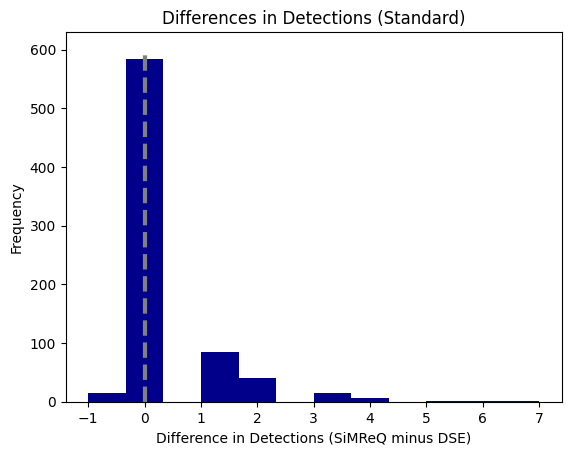

In [183]:
plt.hist(difference, bins=int(max(difference)+5), color="darkblue")
plt.xlabel("Difference in Detections (SiMReQ minus DSE)")
plt.ylabel("Frequency")
plt.title(f"Differences in Detections ({simreq_type})")
plt.plot([0, 0], [0, 600], color="grey", linewidth=3, linestyle="dashed")
plt.savefig(f"fig_diffhist-{logfname}.png", dpi=figdpi)